In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

seed_ = 42

In [2]:
X, y = make_blobs(n_samples=100, random_state=seed_)

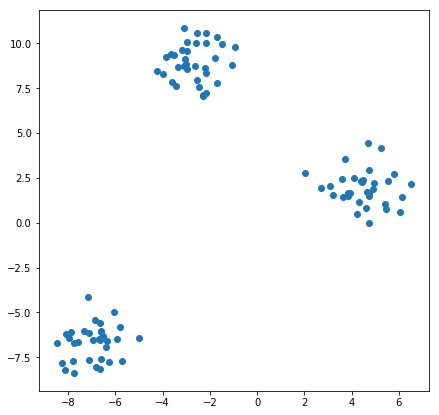

In [3]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])

In [4]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [5]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для классификации
    classes = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к классу, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения с новыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes

In [6]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()

In [7]:
def inclass_dist(centroids, clusters):
    return np.sum([np.sum([e_metrics(centroids[i], clusters[i][j]) for j in range(len(clusters[i]))]) 
                   for i in range(len(centroids))])

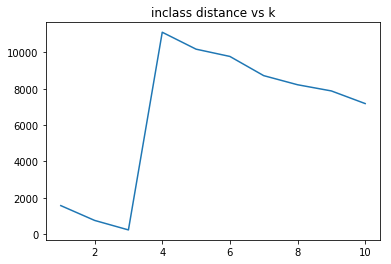

In [8]:
kx = [i for i in range(1, 11)]
dx = []
min_distance = 1e-4
max_iterations = 100
for k in kx:
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    d = inclass_dist(centroids, clusters)
    dx.append(d)

plt.title('inclass distance vs k')
plt.plot(kx, dx)